### Introduction
In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.  

*Note: We will briefly discuss this homework assignment on Thursday in class.*  

**Data**  
For this assignment we will use two databases:  
1) The Sean Lahman's Baseball Database which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please read the documentation.": http://seanlahman.com/baseball-archive/statistics  
  
2) Gapminder is a great resource that contains over 500 data sets related to world indicators such as income, GDP and life expectancy: https://www.gapminder.org
  
**Purpose**  
In this assignment, you will learn how to:
- Load in CSV files from the web.
- Create functions in python.
- Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots.
  
Useful libraries for this assignment
numpy, for arrays
pandas, for data frames
matplotlib, for plotting

In [69]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Problem 1  
In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared.



**Problem 1(a)**  
Load in these CSV files from the Sean Lahman's Baseball Database.  
For this assignment, we will use the **'Salaries.csv'** and **'Teams.csv'** tables.  
Read these tables into a pandas DataFrame and show the head of each table.  
*Hint Use the requests, StringIO and zipfile modules to get from the web.*

In [2]:
url = '/Users/jennawhite/Documents/wild_west/Other_Classes/lahman-csv_2014-02-14/Salaries.csv'
salaries = pd.read_csv(url)

In [7]:
print 'Shape:', salaries.shape
salaries.head()

Shape: (23956, 5)


,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [25]:
url2 = '/Users/jennawhite/Documents/wild_west/Other_Classes/lahman-csv_2014-02-14/Teams.csv'
teams = pd.read_csv(url2)

In [26]:
print 'Shape:', teams.shape
teams.head()

Shape: (2745, 48)


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


**Problem 1(b)**  
Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame.

In [51]:
salaries_gp = salaries.groupby(['teamID','yearID'], as_index=False).sum()
salaries_gp[salaries_gp['teamID']=='COL']

,teamID,yearID,salary
239,COL,1993,10353500
240,COL,1994,23887333
241,COL,1995,34154717
242,COL,1996,40179823
243,COL,1997,43559667
244,COL,1998,50484648
245,COL,1999,61935837
246,COL,2000,61111190
247,COL,2001,71541334
248,COL,2002,56851043


**Problem 1(c)**  
Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.  

**Hint:** Merge the DataFrames using teamID and yearID.

In [55]:
merged = pd.merge(left=teams, right=salaries_gp, how='left', on=['yearID','teamID'])
merged[merged['teamID']=='COL'].tail()

#merged_left = pd.merge(left=survey_sub,right=species_sub, how='left', left_on='species_id', right_on='species_id')

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,salary
2621,2009,NL,COL,COL,W,2,162,81.0,92,70,...,0.980,Colorado Rockies,Coors Field,2665080.0,112,112,COL,COL,COL,75201000.0
2652,2010,NL,COL,COL,W,3,162,81.0,83,79,...,0.980,Colorado Rockies,Coors Field,2875245.0,115,115,COL,COL,COL,84227000.0
2683,2011,NL,COL,COL,W,4,162,81.0,73,89,...,0.980,Colorado Rockies,Coors Field,2909777.0,116,116,COL,COL,COL,88148071.0
2714,2012,NL,COL,COL,W,5,162,81.0,64,98,...,0.980,Colorado Rockies,Coors Field,2630458.0,120,121,COL,COL,COL,78069571.0
2744,2013,NL,COL,COL,W,5,162,81.0,74,88,...,0.986,Colorado Rockies,Coors Field,2793828.0,117,118,COL,COL,COL,74409071.0


**Problem 1(d)**  
How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end?  

**Hints:** Use a for loop to consider multiple years. Use the teamID (three letter representation of the team name) to save space on the plot.

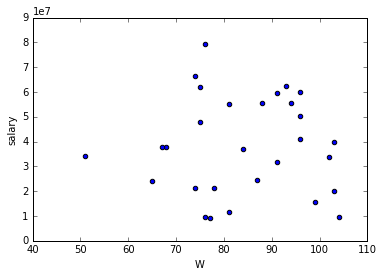

In [65]:
merged[merged['teamID']=='OAK'].plot.scatter(x='W', y='salary')

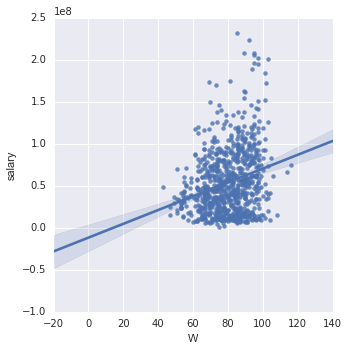

In [73]:
sns.lmplot(x='W', y='salary', data=merged)

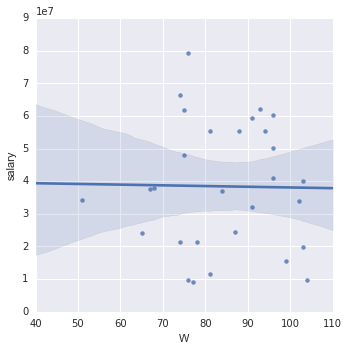

In [74]:
sns.lmplot(x='W', y='salary', data=merged[merged['teamID']=='OAK'])

**Problem 1(e):**  
For AC209 Students: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d).